## Assignment №1

In [30]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import IPython

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For the first assignment let's take the dataset from one famous Kaggle competition: https://www.kaggle.com/c/titanic. With the tools of machine learning we should predict which passengers survived the Titanic tragedy.

In [4]:
titanic_df = pd.read_csv('titanic/train.csv')

Let's take a look at the data. Detailed description of all the features in the dataset can be found here: https://www.kaggle.com/c/titanic/data. Each row stands for one particular passenger.

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survival: 0 = No, 1 = Yes
* pclass: Ticket class
* sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Let's take some features from this dataset that I think are the most interesting. We also drop all the NaN values from the table.

In [8]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

Now let's perform some feature engineering. First of all, let's transform the features 'SibSp' and 'Parch' into one new feature that will mean whether the passenger was on board alone or with relatives.

In [11]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
titanic_df = titanic_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


We have 2 categorical features in the remaining dataset: 'Sex' and 'Embarked'. We should transform them to numerical for the tree to successfully make splits. But we can not simply transform, for example, feature 'Embarked' this way: C (Cherbourg) => 1, Q (Queenstown) => 2, S (Southampton) => 3, because it will lead to some incorrect properties like Cherbourg + Queenstown = Southampton. That's why we should use one-hot encoding. Let's perform this transformation to 'Pclass' feature for the same reasons.

In [13]:
titanic_df = pd.get_dummies(titanic_df, columns=['Pclass', 'Sex', 'Embarked'])

In [14]:
titanic_df.head()

,Survived,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Now let's prepare two separate parts of data for training and testing.

In [17]:
targets = titanic_df['Survived']
predictors = titanic_df.drop(['Survived'], axis=1)

In [18]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [19]:
print pred_train.shape
print pred_test.shape
print tar_train.shape
print tar_test.shape

(427, 11)
(285, 11)
(427L,)
(285L,)


Train the tree:

In [119]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

Make predictions:

In [120]:
predictions = classifier.predict(pred_test)

Evaluate accuracy and confusion matrix:

In [121]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.73333333333333328

In [122]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[136,  37],
       [ 39,  73]])

The results of classification on test data are not perfect, but pretty good anyway despite the simplicity of the model. Let's take a look on the first several splits in the tree:

In [28]:
sklearn.tree.export_graphviz(classifier, out_file='tree.dot', feature_names=pred_train.columns)

I had some difficulties with making graphviz work, but it is very convenient to visualize the tree using this page: http://webgraphviz.com . 

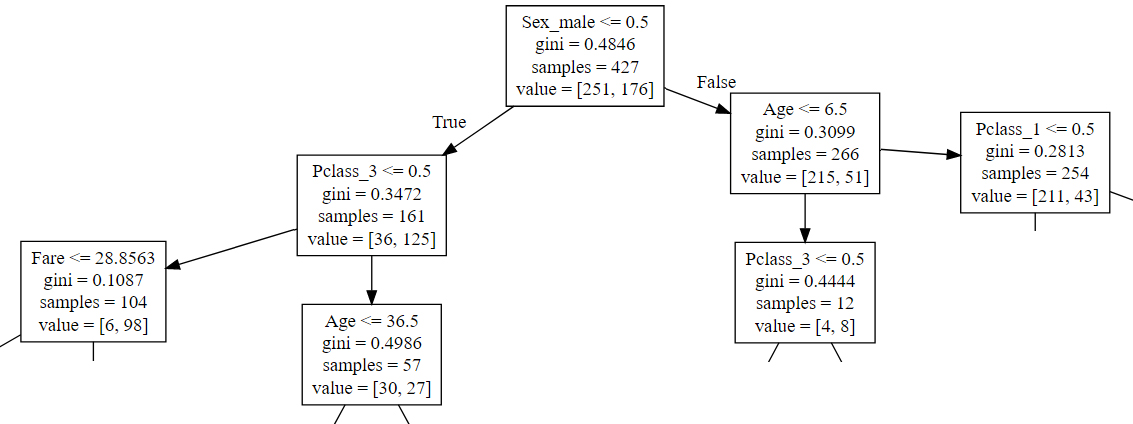

In [36]:
IPython.display.Image('tree.jpg')

As we can see, the first split is made by the feature 'Sex_male'. Feature value 0 leads to much higher number of survived passangers. This can be interpreted in the way that men helped women to be rescued first. Then the splits are made by features 'Age', 'Pclass_n'.

Finally, let's take a look at the plot which represents feature importances in the tree:

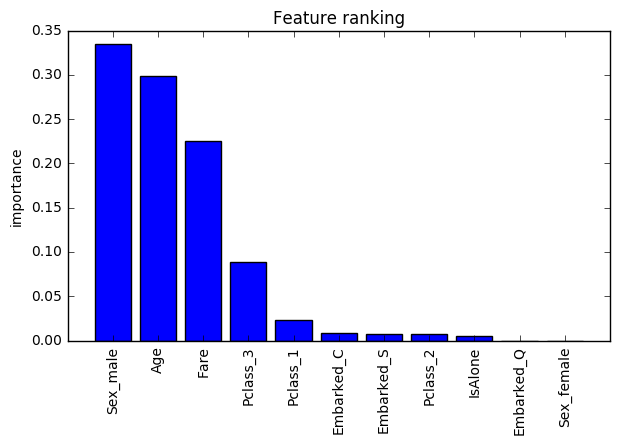

In [158]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(7, 4))
plt.title("Feature ranking")
plt.bar(range(pred_train.shape[1]), importances[indices],
    color="b", 
    align="center")
feature_names = [pred_train.columns[i] for i in indices]
plt.xticks(range(pred_train.shape[1]), feature_names, rotation='vertical')
plt.xlim([-1, pred_train.shape[1]])
plt.ylabel("importance")

We see that 'Sex_male' is the most important feature in the model. 'Sex_female' feature is not used at all as it is totally correlated with 'Sex_male'. 'Age' and 'Fare' are also very important.